In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # used for showing graphs

In [19]:
dfx=pd.read_csv('../Datasets/Locally Weighted Regression/weightedX.csv')
dfy=pd.read_csv('../Datasets/Locally Weighted Regression/weightedY.csv')
x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


In [20]:
plt.style.use("seaborn")

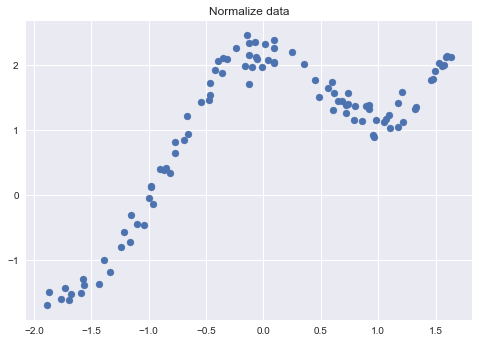

In [22]:
x=(x-x.mean())/x.std()
plt.title('Normalize data')
plt.scatter(x,y)
plt.show()

In [23]:
#Find out w
def get_w(queryPoint,X,tau):
    m=X.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        xi=X[i]
        x=queryPoint
        w[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return w

In [24]:
x=np.mat(x)
y=np.mat(y)
w=get_w(-1,x,0.5)
print(w.shape)

(99, 99)


In [25]:
# make predictions

def predict(x,y,queryPoint,tau):
    ones=np.ones((x.shape[0],1))
    x_=np.hstack((x,ones))
    
    qx=np.mat([queryPoint,1])
    w=get_w(qx,x_,tau)
    
    theta=np.linalg.pinv(x_.T*(w*x_))*(x_.T*(w*y))
    pred=qx*theta
    return theta,pred


In [26]:
theta,pred=predict(x,y,1.0,1.0)
print(theta)


[[0.14069504]
 [1.45348191]]


In [27]:
print(pred)

[[1.59417694]]


# Visualize the Predictions


In [49]:
def vis_Prediction(tau):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    for qx in x_test:
        theta,pred=predict(x,y,qx,tau)
        y_test.append(pred)
    
    y_test=np.array(y_test)
    xo=np.array(x)
    yo=np.array(y)
    plt.title("Tau bandwidth param = %.2f"%tau)
    plt.scatter(xo,yo)
    plt.scatter(x_test,y_test,color='red')
    plt.show()
    

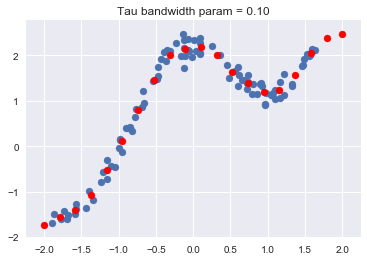

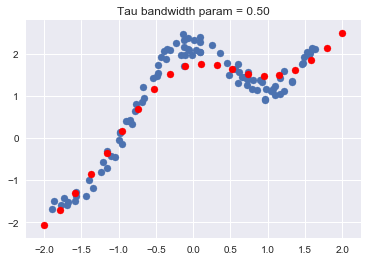

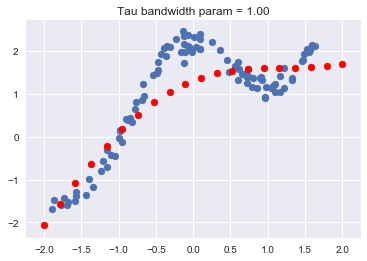

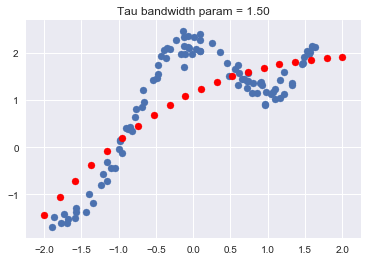

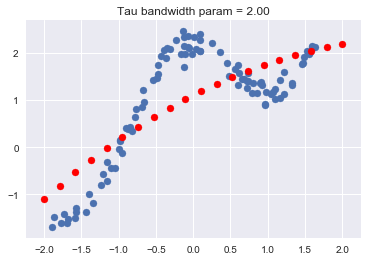

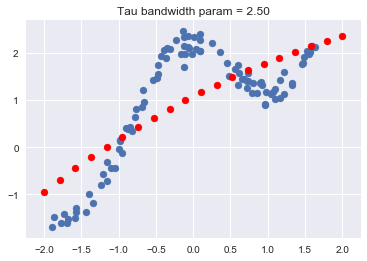

In [52]:
taus=[0.1,0.5,1.,1.5,2,2.5]
for t in taus:
    vis_Prediction(t)
    